In [4]:
# load the pockages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [207]:
# Load the Data
df = pd.read_csv("Linear_Reg_1D.csv", header=None)

In [208]:
df.head()

,0,1
0,95.724162,197.179636
1,35.757619,67.590670
2,28.816847,60.854133
3,99.958481,196.907397
4,66.809748,125.311129


In [209]:
# Checking if there's any missing values
dataset.isnull().any()

1    False
2    False
dtype: bool

In [210]:
# Convert into X, y 
X = df[0]
y = df[1]

In [211]:
# Convert into numpy arrays
X = X.to_numpy().astype(np.float)
y = y.to_numpy().astype(np.float)

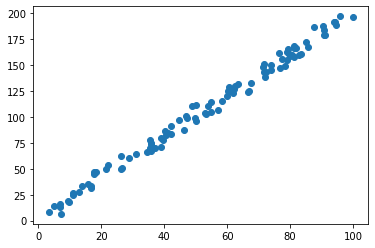

In [212]:
# Plot the data in a scatter plot
plt.scatter(X, y)
plt.show()

In [213]:
# To find the best line need to find the a and b of Yhat = aX + b
a = (np.dot(X,y) / X.shape[0] - np.mean(X)*np.mean(y)) / (np.dot(X,X) / X.shape[0] - np.mean(X)*np.mean(X))

In [214]:
# Slope of the best fit line
a

1.9726121674845958

In [215]:
# Intercept of the line
b = (np.dot(X,X) * np.mean(y) / X.shape[0] - np.mean(X)*np.dot(X,y) / X.shape[0]) / (np.dot(X,X) / X.shape[0] - np.mean(X)*np.mean(X))

In [216]:
b

2.8644240756601573

In [217]:
# Final Equation
Yhat = a*X + b

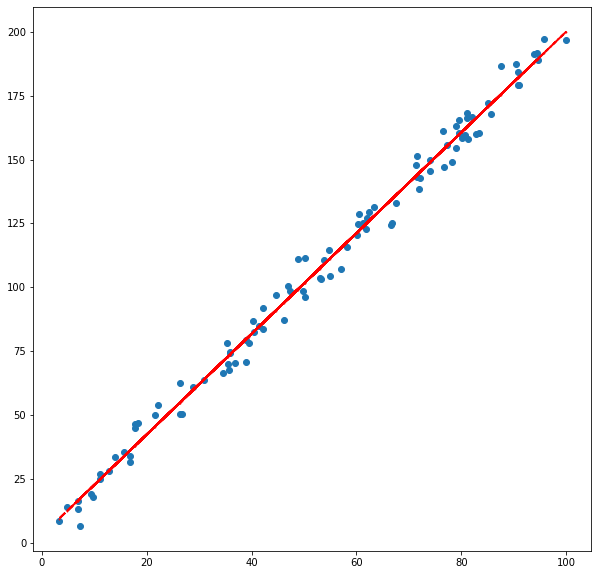

In [218]:
# Best fit line on the data
plt.figure(figsize=(10,10))
plt.scatter(X, y)
plt.plot(X, Yhat, 'rd--', linewidth=2, markersize=1)
plt.show()

R^2 Calculation

In [219]:
# Sum of Risiduals
Sum_of_Residuals = sum((y-Yhat)**2)

In [220]:
# Sum of square total
Sum_Square_Total = sum((y-np.mean(y))**2)

In [221]:
# R-Squared calculation
R_squared = 1.0 - (Sum_of_Residuals / Sum_Square_Total)

In [222]:
print("R_squared: {}".format(R_squared))

R_squared: 0.9911838202977805


# Moore's Law Problem

In [40]:
# Load Transister count (1st column) variable and the Year variable (2nd column) only
dataset = pd.read_table("moore_law.csv", usecols=[1,2], header=None)

In [41]:
# Independer Variable = Time (2nd column)
# Dependent Variable = Transister Count (1st Column)
X = dataset[2]
y = dataset[1]

In [42]:
y

0                   2,300
1                   3,500
2                   4,500
3                   4,100
4                   5,000
              ...        
97          3,990,000,000
98          7,100,000,000
99      cca 1,750,000,000
100    10,000,000,000[37]
101    ~7,200,000,000[36]
Name: 1, Length: 102, dtype: object

In [43]:
# Data has entries like '1974[7]', 'eeee 10', "1,000,000" so removing all of these using RegEx
def clean(row):
    row = re.sub(r"[\(\[].*?[\)\]]", "", row) # Removinig [] and its contents
    row = row.replace(",","") # Remove Comma
    row = re.sub('\D', '', row) # Remove Non-digit characters like letters
    return row

In [44]:
# Clean the data using RegEx function
X = X.apply(clean)
y = y.apply(clean)

In [45]:
# Convert into numpy
X = X.to_numpy().astype(np.float)
y = y.to_numpy().astype(np.float)

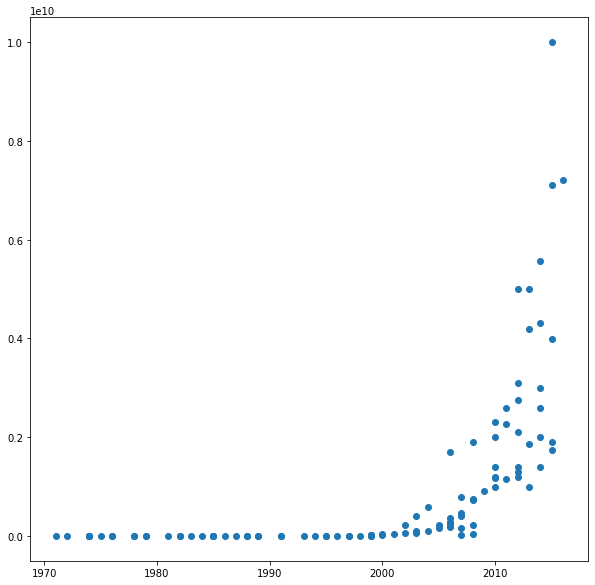

In [46]:
# plot the graph
plt.figure(figsize=(10,10))
plt.scatter(X,y)

In [47]:
# Converting Polynomial into log so Taking the log of y
y_log = np.log(y)

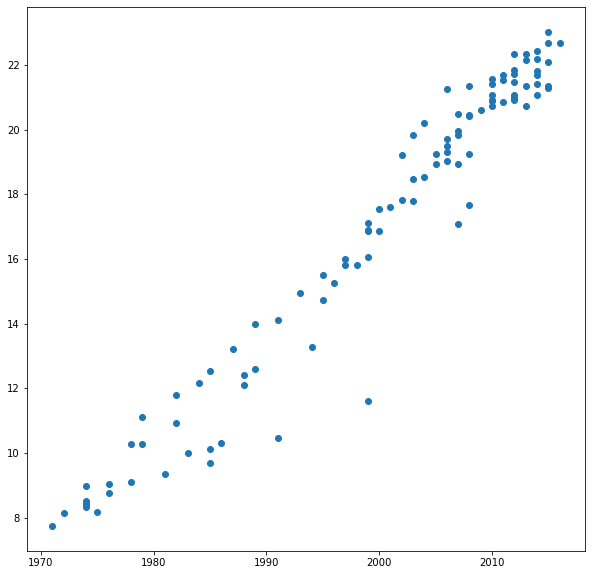

In [48]:
# Ploting the X and y_log
plt.figure(figsize=(10,10))
plt.scatter(X, y_log)

In [50]:
# Calculate the a and b parametes for this dataset
a = (np.dot(X,y_log) / X.shape[0] - np.mean(X)*np.mean(y_log)) / (np.mean(X**2) - np.mean(X)**2)
b = (np.mean(y_log)*np.mean(X**2) - np.mean(X)*np.dot(X,y_log) / X.shape[0]) / (np.mean(X**2) - np.mean(X)**2)
a,b

(0.3510435733650517, -685.0002843818112)

In [51]:
Yhat = a*X + b

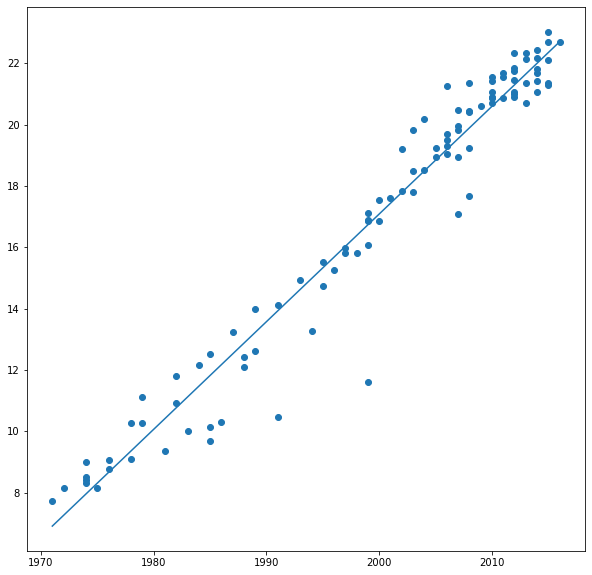

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(X, y_log)
plt.plot(X, Yhat)
plt.show()

In [59]:
# Detemining how well the model predict
error = y_log - Yhat
average = y_log - np.mean(y_log)

Sum_Square_Residual = np.dot(error,error)
Sum_Square_Total = np.dot(average,average)

R_squard = 1 - Sum_Square_Residual / Sum_Square_Total

In [60]:
R_squard

0.9529442852285762

In [84]:
# Questing is how many years would take to double the Transister count?
"""
y = Transister Count
x1 = 1st Year
x2 = 2nd year

log(y) = a*x + b
y = e^(a*x + b) = e^(ax1)*e^(b) <-- First Year
2y = 2 * e^(ax) * e^(b) = e^log(2) * e^(ax1) * e^(b)

Double the Transister count
2y = a*x2 + b <-- When Transister get double, Unknown year become x2
e^log(2) * e^(ax1) * e^(b) = e^(ax2) + e^(b)
e^log(2) * e^(ax1) = e^(ax2)
log(2) + ax1 = ax2

So, x2 = x1 + log(2)/a

"""

'\ny = Transister Count\nx1 = 1st Year\nx2 = 2nd year\n\nlog(y) = a*x + b\ny = e^(a*x + b) = e^(ax1)*e^(b) <-- First Year\n2y = 2 * e^(ax) * e^(b) = e^log(2) * e^(ax1) * e^(b)\n\nDouble the Transister count\n2y = a*x2 + b <-- When Transister get double, Unknown year become x2\ne^log(2) * e^(ax1) * e^(b) = e^(ax2) + e^(b)\ne^log(2) * e^(ax1) = e^(ax2)\nlog(2) + ax1 = ax2\n\nSo, x2 = x1 + log(2)/a\n\n'

In [85]:
# Calculating x2 which will gives number of years will take to double the Transister count
time = np.log(2) / a

In [86]:
print("Time it takes to double transister count is: ", time)

Time it takes to double transister count is:  1.9745331723795398


## Almost 2 years will take to double the Transister count according to Moore's Law